## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0803 10:50:10.363795 18980 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 10:50:10.394546 18980 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 10:50:10.397027 18980 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0803 10:50:11.518265 18980 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 10:50:11.526696 18980 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0803 10:50:14.262511 18980 deprecation.py:323] From C:\Users\an_fl\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0803 10:50:14.310127 18980 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.9300 - acc: 0.3019 - val_loss: 1.8010 - val_acc: 0.3493
Epoch 2/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.7115 - acc: 0.3871 - val_loss: 1.6792 - val_acc: 0.3899
Epoch 3/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6159 - acc: 0.4221 - val_loss: 1.5830 - val_acc: 0.4298
Epoch 4/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.5552 - acc: 0.4436 - val_loss: 1.5530 - val_acc: 0.4445
Epoch 5/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.5006 - acc: 0.4638 - val_loss: 1.5145 - val_acc: 0.4622
Epoch 6/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.4591 - acc: 0.4817 - val_loss: 1.4844 - val_acc: 0.4730
Epoch 7/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.4296 - acc: 0.4917 - val_loss: 1.

Epoch 59/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.5277 - acc: 0.8121 - val_loss: 2.0564 - val_acc: 0.5082
Epoch 60/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.5428 - acc: 0.8056 - val_loss: 2.1583 - val_acc: 0.5016
Epoch 61/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.5149 - acc: 0.8177 - val_loss: 2.1290 - val_acc: 0.5091
Epoch 62/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.4913 - acc: 0.8248 - val_loss: 2.1266 - val_acc: 0.5098
Epoch 63/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.4795 - acc: 0.8286 - val_loss: 2.1216 - val_acc: 0.5116
Epoch 64/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.4620 - acc: 0.8352 - val_loss: 2.1599 - val_acc: 0.5057
Epoch 65/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.4809 - acc: 0.8280 - val_loss: 2.1737 - val_acc: 0.5054
Epoch 66/500
50000

Epoch 117/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.2413 - acc: 0.9146 - val_loss: 3.4581 - val_acc: 0.4939
Epoch 118/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.2397 - acc: 0.9133 - val_loss: 3.4723 - val_acc: 0.4967
Epoch 119/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.2234 - acc: 0.9210 - val_loss: 3.4961 - val_acc: 0.4920
Epoch 120/500
50000/50000 [==============================] - 8s 167us/step - loss: 0.2045 - acc: 0.9255 - val_loss: 3.4772 - val_acc: 0.4896
Epoch 121/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.2407 - acc: 0.9142 - val_loss: 3.4850 - val_acc: 0.4973
Epoch 122/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.2135 - acc: 0.9236 - val_loss: 3.5497 - val_acc: 0.4937
Epoch 123/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.2680 - acc: 0.9052 - val_loss: 3.6142 - val_acc: 0.4932
Epoch 124/500

50000/50000 [==============================] - 10s 199us/step - loss: 0.1517 - acc: 0.9463 - val_loss: 4.2765 - val_acc: 0.4949
Epoch 176/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.2107 - acc: 0.9283 - val_loss: 4.1551 - val_acc: 0.4946
Epoch 177/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1801 - acc: 0.9377 - val_loss: 4.1646 - val_acc: 0.4950
Epoch 178/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1671 - acc: 0.9412 - val_loss: 4.2097 - val_acc: 0.4987
Epoch 179/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.1647 - acc: 0.9422 - val_loss: 4.1962 - val_acc: 0.4976
Epoch 180/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.1050 - acc: 0.9629 - val_loss: 4.2624 - val_acc: 0.4940
Epoch 181/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.1471 - acc: 0.9476 - val_loss: 4.3117 - val_acc: 0.4922
Epoch 182/500
50000/5

Epoch 233/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0590 - acc: 0.9799 - val_loss: 4.7192 - val_acc: 0.4952
Epoch 234/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1308 - acc: 0.9563 - val_loss: 4.6696 - val_acc: 0.4978
Epoch 235/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.2998 - acc: 0.9089 - val_loss: 4.6320 - val_acc: 0.4924
Epoch 236/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1288 - acc: 0.9556 - val_loss: 4.5936 - val_acc: 0.4936
Epoch 237/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.0760 - acc: 0.9739 - val_loss: 4.6941 - val_acc: 0.4934
Epoch 238/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.0651 - acc: 0.9781 - val_loss: 4.7106 - val_acc: 0.4978
Epoch 239/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0842 - acc: 0.9709 - val_loss: 4.6346 - val_acc: 0.4982
Epoch 

50000/50000 [==============================] - 9s 188us/step - loss: 0.1374 - acc: 0.9532 - val_loss: 4.8458 - val_acc: 0.4878
Epoch 291/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.1236 - acc: 0.9581 - val_loss: 4.8317 - val_acc: 0.4902
Epoch 292/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0839 - acc: 0.9711 - val_loss: 4.8899 - val_acc: 0.4946
Epoch 293/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0676 - acc: 0.9771 - val_loss: 4.9043 - val_acc: 0.4935
Epoch 294/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0667 - acc: 0.9763 - val_loss: 4.9362 - val_acc: 0.4927
Epoch 295/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.1292 - acc: 0.9579 - val_loss: 4.9137 - val_acc: 0.4861
Epoch 296/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.2851 - acc: 0.9157 - val_loss: 4.7539 - val_acc: 0.4932
Epoch 297/500
50000/500

50000/50000 [==============================] - 9s 187us/step - loss: 0.0379 - acc: 0.9876 - val_loss: 4.9933 - val_acc: 0.4988
Epoch 348/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0541 - acc: 0.9808 - val_loss: 5.0676 - val_acc: 0.4991.0541 - acc: 0.980
Epoch 349/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0968 - acc: 0.9676 - val_loss: 5.1651 - val_acc: 0.4791
Epoch 350/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.2087 - acc: 0.9366 - val_loss: 4.9278 - val_acc: 0.4932
Epoch 351/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.1106 - acc: 0.9638 - val_loss: 5.0822 - val_acc: 0.4830
Epoch 352/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0862 - acc: 0.9705 - val_loss: 4.9579 - val_acc: 0.4974
Epoch 353/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0444 - acc: 0.9853 - val_loss: 4.9945 - val_acc: 0.4959
Epoch 354

50000/50000 [==============================] - 9s 183us/step - loss: 0.0043 - acc: 0.9995 - val_loss: 5.0707 - val_acc: 0.5036
Epoch 405/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 5.1141 - val_acc: 0.5052
Epoch 406/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0029 - acc: 0.9998 - val_loss: 5.1270 - val_acc: 0.5033
Epoch 407/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0039 - acc: 0.9996 - val_loss: 5.1391 - val_acc: 0.5014
Epoch 408/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.6922 - acc: 0.8555 - val_loss: 4.6659 - val_acc: 0.4879
Epoch 409/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.2339 - acc: 0.9295 - val_loss: 4.6712 - val_acc: 0.4897
Epoch 410/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0562 - acc: 0.9816 - val_loss: 4.8075 - val_acc: 0.5000
Epoch 411/500
50000/50000 [

50000/50000 [==============================] - 9s 188us/step - loss: 0.2546 - acc: 0.9213 - val_loss: 4.3516 - val_acc: 0.4952
Epoch 462/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0576 - acc: 0.9811 - val_loss: 4.4972 - val_acc: 0.4948
Epoch 463/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0364 - acc: 0.9888 - val_loss: 4.5513 - val_acc: 0.5019
Epoch 464/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0237 - acc: 0.9936 - val_loss: 4.6558 - val_acc: 0.4999
Epoch 465/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0122 - acc: 0.9979 - val_loss: 4.6830 - val_acc: 0.5009loss: 0
Epoch 466/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0076 - acc: 0.9993 - val_loss: 4.6975 - val_acc: 0.5078
Epoch 467/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0045 - acc: 0.9998 - val_loss: 4.7507 - val_acc: 0.5044
Epoch 468/500
5000

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Optimizer 換成 SGD

In [8]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 119us/step - loss: 2.2602 - acc: 0.1634 - val_loss: 2.2119 - val_acc: 0.2173
Epoch 2/500
50000/50000 [==============================] - 6s 124us/step - loss: 2.1792 - acc: 0.2333 - val_loss: 2.1458 - val_acc: 0.2480
Epoch 3/500
50000/50000 [==============================] - 6s 124us/step - loss: 2.1202 - acc: 0.2590 - val_loss: 2.0954 - val_acc: 0.2624
Epoch 4/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.0745 - acc: 0.2745 - val_loss: 2.0549 - val_acc: 0.2757
Epoch 5/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.0381 - acc: 0.2849 - val_loss: 2.0232 - val_acc: 0.2865
Epoch 6/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.0086 - acc: 0.2946 - val_loss: 1.9973 - val_acc: 0.2972
Epoch 7/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.9839 - acc: 0.3046 - val_loss: 1.

50000/50000 [==============================] - 6s 121us/step - loss: 1.6536 - acc: 0.4274 - val_loss: 1.6622 - val_acc: 0.4239
Epoch 60/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.6506 - acc: 0.4297 - val_loss: 1.6596 - val_acc: 0.4222
Epoch 61/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.6471 - acc: 0.4292 - val_loss: 1.6559 - val_acc: 0.4280
Epoch 62/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.6443 - acc: 0.4291 - val_loss: 1.6530 - val_acc: 0.4255
Epoch 63/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.6413 - acc: 0.4316 - val_loss: 1.6516 - val_acc: 0.4254
Epoch 64/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.6381 - acc: 0.4324 - val_loss: 1.6499 - val_acc: 0.4287
Epoch 65/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6354 - acc: 0.4331 - val_loss: 1.6471 - val_acc: 0.4273
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 121us/step - loss: 1.5173 - acc: 0.4728 - val_loss: 1.5457 - val_acc: 0.4587
Epoch 118/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.5154 - acc: 0.4743 - val_loss: 1.5439 - val_acc: 0.4560
Epoch 119/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.5140 - acc: 0.4733 - val_loss: 1.5449 - val_acc: 0.4571
Epoch 120/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.5123 - acc: 0.4752 - val_loss: 1.5417 - val_acc: 0.4594
Epoch 121/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.5104 - acc: 0.4768 - val_loss: 1.5455 - val_acc: 0.4516
Epoch 122/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.5088 - acc: 0.4765 - val_loss: 1.5403 - val_acc: 0.4568
Epoch 123/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.5067 - acc: 0.4766 - val_loss: 1.5370 - val_acc: 0.4601
Epoch 124/500
50000/50000 [

Epoch 175/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.4227 - acc: 0.5059 - val_loss: 1.4768 - val_acc: 0.4785
Epoch 176/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.4213 - acc: 0.5063 - val_loss: 1.4803 - val_acc: 0.4733
Epoch 177/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.4202 - acc: 0.5060 - val_loss: 1.4810 - val_acc: 0.4774
Epoch 178/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.4185 - acc: 0.5075 - val_loss: 1.4762 - val_acc: 0.4748
Epoch 179/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.4167 - acc: 0.5083 - val_loss: 1.4778 - val_acc: 0.4798
Epoch 180/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.4159 - acc: 0.5081 - val_loss: 1.4749 - val_acc: 0.4804
Epoch 181/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.4137 - acc: 0.5095 - val_loss: 1.4727 - val_acc: 0.4854
Epoch 182/500

50000/50000 [==============================] - 6s 121us/step - loss: 1.3413 - acc: 0.5343 - val_loss: 1.4264 - val_acc: 0.4931
Epoch 233/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.3401 - acc: 0.5345 - val_loss: 1.4328 - val_acc: 0.4918
Epoch 234/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.3383 - acc: 0.5351 - val_loss: 1.4256 - val_acc: 0.4968
Epoch 235/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.3368 - acc: 0.5355 - val_loss: 1.4260 - val_acc: 0.4969
Epoch 236/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.3361 - acc: 0.5355 - val_loss: 1.4209 - val_acc: 0.4953
Epoch 237/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.3343 - acc: 0.5364 - val_loss: 1.4294 - val_acc: 0.4931
Epoch 238/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.3332 - acc: 0.5362 - val_loss: 1.4328 - val_acc: 0.4900
Epoch 239/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 1.2660 - acc: 0.5589 - val_loss: 1.3993 - val_acc: 0.4995
Epoch 291/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.2658 - acc: 0.5596 - val_loss: 1.3929 - val_acc: 0.5036
Epoch 292/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.2639 - acc: 0.5594 - val_loss: 1.3948 - val_acc: 0.5009
Epoch 293/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.2625 - acc: 0.5600 - val_loss: 1.3916 - val_acc: 0.5026
Epoch 294/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.2618 - acc: 0.5613 - val_loss: 1.4070 - val_acc: 0.4997
Epoch 295/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2600 - acc: 0.5611 - val_loss: 1.3914 - val_acc: 0.5068
Epoch 296/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2596 - acc: 0.5608 - val_loss: 1.4040 - val_acc: 0.4980
Epoch 297/500
50000/50000 [

Epoch 348/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1981 - acc: 0.5824 - val_loss: 1.3955 - val_acc: 0.5082
Epoch 349/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.1978 - acc: 0.5845 - val_loss: 1.3603 - val_acc: 0.5183
Epoch 350/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.1953 - acc: 0.5847 - val_loss: 1.3591 - val_acc: 0.5165
Epoch 351/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.1940 - acc: 0.5839 - val_loss: 1.3590 - val_acc: 0.5179
Epoch 352/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.1941 - acc: 0.5856 - val_loss: 1.3695 - val_acc: 0.5125
Epoch 353/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.1922 - acc: 0.5863 - val_loss: 1.3677 - val_acc: 0.5148
Epoch 354/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.1918 - acc: 0.5863 - val_loss: 1.3682 - val_acc: 0.5104
Epoch 355/500

50000/50000 [==============================] - 8s 153us/step - loss: 1.1336 - acc: 0.6068 - val_loss: 1.3441 - val_acc: 0.5213
Epoch 407/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.1328 - acc: 0.6079 - val_loss: 1.3776 - val_acc: 0.5145
Epoch 408/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.1314 - acc: 0.6068 - val_loss: 1.3486 - val_acc: 0.5197
Epoch 409/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1307 - acc: 0.6089 - val_loss: 1.3777 - val_acc: 0.5069
Epoch 410/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.1310 - acc: 0.6070 - val_loss: 1.3738 - val_acc: 0.5143
Epoch 411/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1292 - acc: 0.6088 - val_loss: 1.3722 - val_acc: 0.5149
Epoch 412/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1287 - acc: 0.6077 - val_loss: 1.3599 - val_acc: 0.5166
Epoch 413/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 1.0755 - acc: 0.6272 - val_loss: 1.3402 - val_acc: 0.5233
Epoch 465/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.0743 - acc: 0.6276 - val_loss: 1.3799 - val_acc: 0.5136
Epoch 466/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.0716 - acc: 0.6278 - val_loss: 1.3649 - val_acc: 0.5199
Epoch 467/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0706 - acc: 0.6292 - val_loss: 1.3476 - val_acc: 0.5183
Epoch 468/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.0688 - acc: 0.6292 - val_loss: 1.3567 - val_acc: 0.5252
Epoch 469/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.0692 - acc: 0.6279 - val_loss: 1.3436 - val_acc: 0.5270
Epoch 470/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.0677 - acc: 0.6295 - val_loss: 1.3403 - val_acc: 0.5274
Epoch 471/500
50000/50000 [

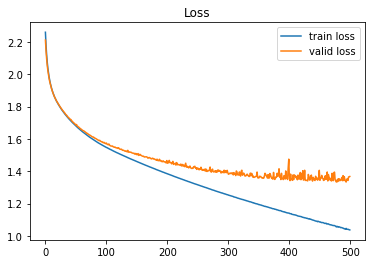

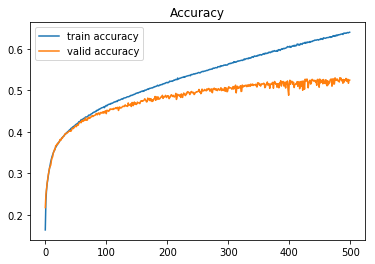

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()